In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../data/spam.csv', encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4703,ham,Yar but they say got some error.,NaN,NaN,NaN
3694,ham,"Hello, As per request from &lt;#&gt; Rs.5 ha...",NaN,NaN,NaN
2561,ham,And maybe some pressies,NaN,NaN,NaN
1302,ham,FRAN I DECIDED 2 GO N E WAY IM COMPLETELY BROK...,NaN,NaN,NaN
4450,ham,And that is the problem. You walk around in \j...,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   v1          5572 non-null   str  
 1   v2          5572 non-null   str  
 2   Unnamed: 2  50 non-null     str  
 3   Unnamed: 3  12 non-null     str  
 4   Unnamed: 4  6 non-null      str  
dtypes: str(5)
memory usage: 217.8 KB


In [5]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [6]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [7]:
# Missing values

df.isnull().sum()

target    0
text      0
dtype: int64

In [8]:
# Check for duplicate values

df.duplicated().sum()

np.int64(403)

In [9]:
df = df.drop_duplicates(keep='first')

In [10]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])

# 2. EDA

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

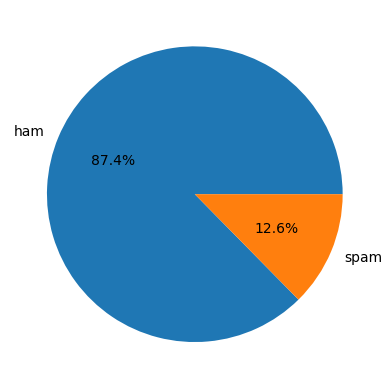

In [15]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%')
plt.show()

In [16]:
# Since data is imbalanced, we will use stratified sampling while splitting the data

In [17]:
import nltk

In [18]:
nltk.download('punkt_tab', quiet=True)

True

In [19]:
df['num_characters'] = df['text'].apply(len)

In [20]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
df['num_words'] = df['text'].apply(lambda x: nltk.word_tokenize(x)).apply(len)

In [22]:
df['num_sentences'] = df['text'].apply(lambda x: nltk.sent_tokenize(x)).apply(len)

In [23]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


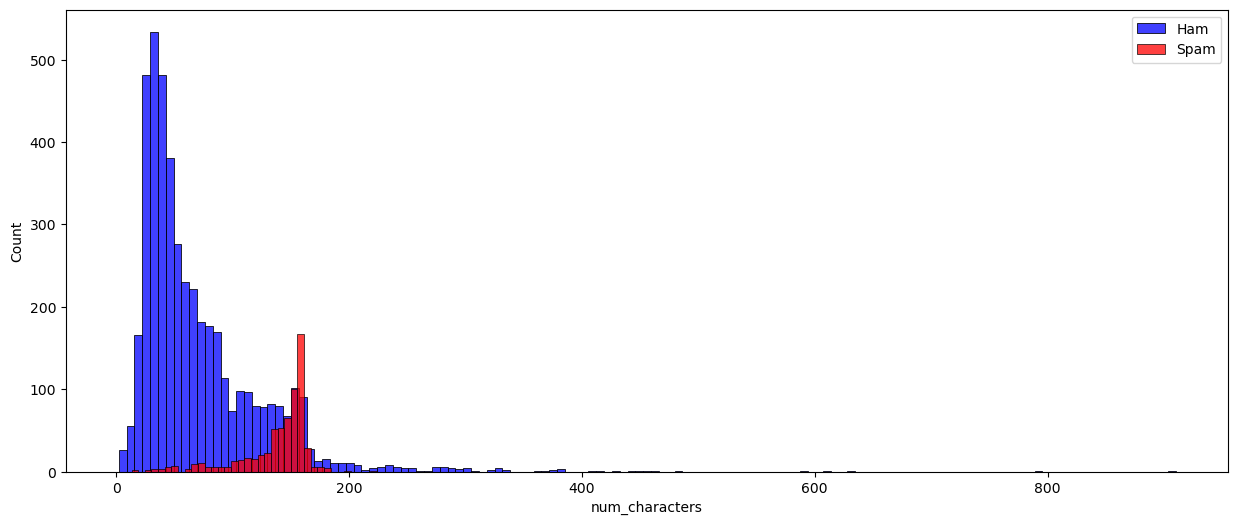

In [36]:
# Histograms
plt.figure(figsize=(15, 6))
sns.histplot(df[df['target'] == 0]['num_characters'], color='blue', label='Ham')
sns.histplot(df[df['target'] == 1]['num_characters'], color='red', label='Spam')
plt.legend()
plt.show()

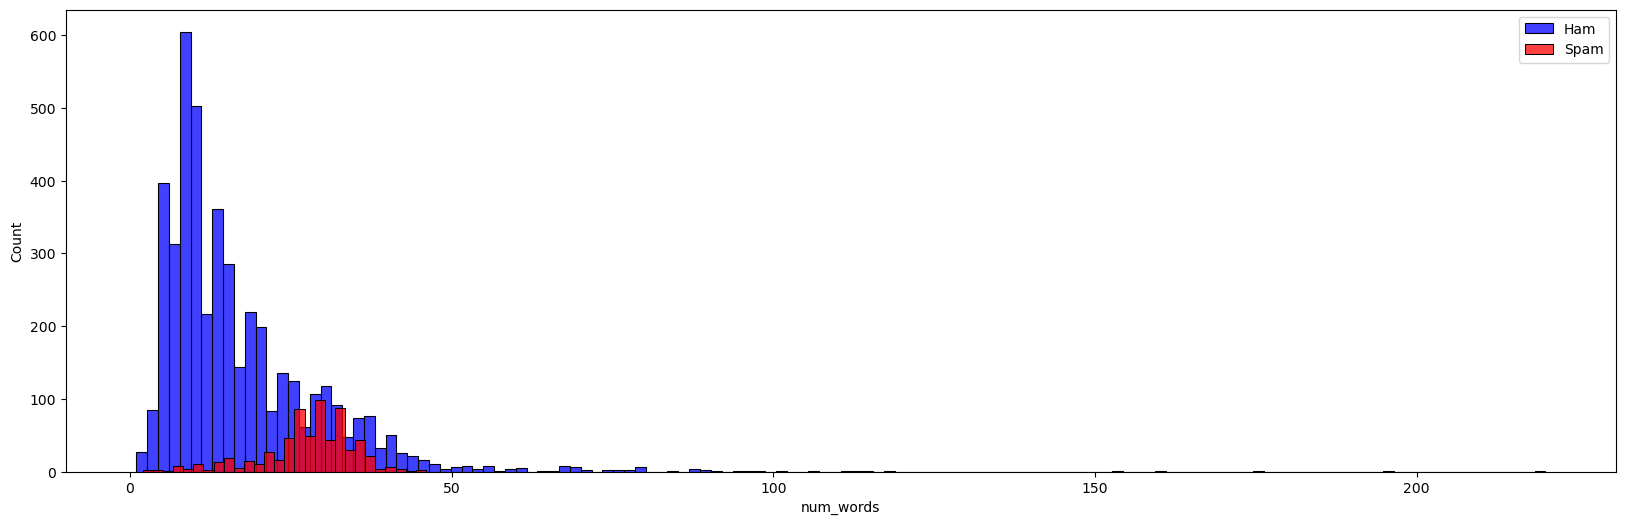

In [39]:
# Histograms
plt.figure(figsize=(20, 6))
sns.histplot(df[df['target'] == 0]['num_words'], color='blue', label='Ham')
sns.histplot(df[df['target'] == 1]['num_words'], color='red', label='Spam')
plt.legend()
plt.show()

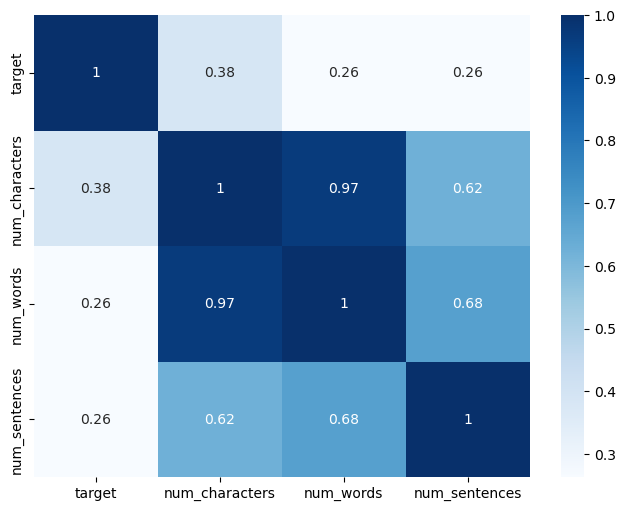

In [43]:
corr = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

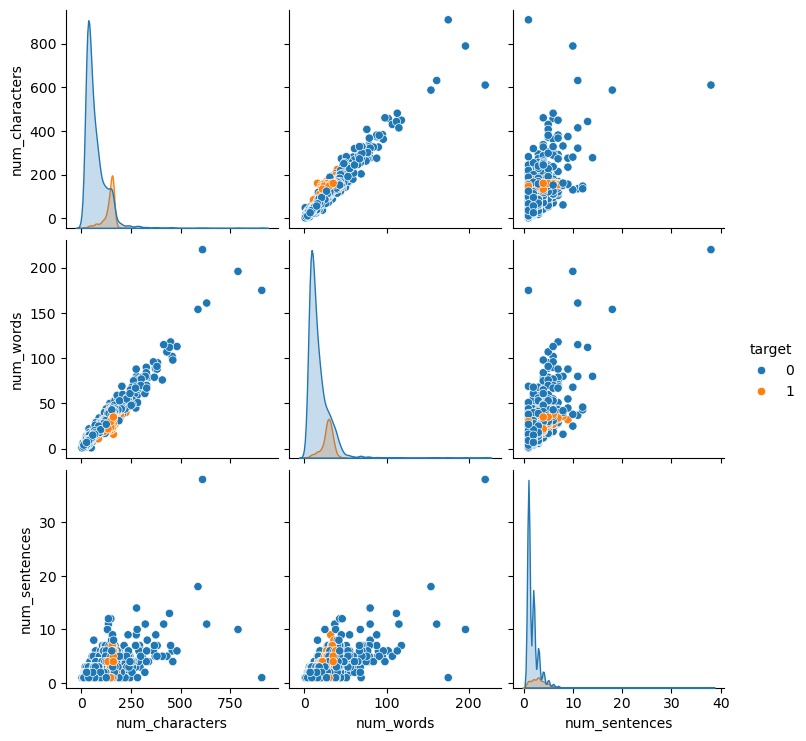

In [41]:
sns.pairplot(df, hue='target')
plt.show()

In [73]:
from nltk.stem.porter import PorterStemmer
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

ps = PorterStemmer()


[nltk_data] Downloading package stopwords to /Users/mbp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [94]:
def transform_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    return " ".join([
        ps.stem(token) 
        for token in tokens 
        if token.isalnum() and token not in stop_words and token not in string.punctuation 
    ])


In [95]:
transform_text('can you come to the epstein island tommorrow? loving dancing %')

'come epstein island tommorrow love danc'

In [96]:
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: str

In [97]:
df['transformed_text'] = df['text'].apply(transform_text)

In [98]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [100]:
!pip install wordcloud

In [101]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [105]:
spam = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

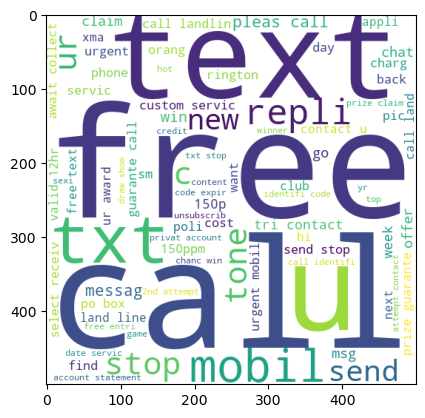

In [106]:
plt.imshow(spam)

In [107]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [108]:
df[df['target'] == 1]['transformed_text'].head(10)

2     free entri 2 wkli comp win fa cup final tkt 21...
5     freemsg hey darl 3 week word back like fun sti...
8     winner valu network custom select receivea pri...
9     mobil 11 month u r entitl updat latest colour ...
11    six chanc win cash 100 pound txt csh11 send co...
12    urgent 1 week free membership prize jackpot tx...
15    xxxmobilemovieclub use credit click wap link n...
19    england v macedonia dont miss news txt ur nati...
34    thank subscript rington uk mobil charg pleas c...
42    07732584351 rodger burn msg tri call repli sm ...
Name: transformed_text, dtype: str

In [109]:
spam_corpus = []
spam_words_list = df[df['target'] == 1]['transformed_text'].tolist()

for text in spam_words_list:
    for word in text.split():
        spam_corpus.append(word)

In [111]:
len(spam_corpus)

9939

In [113]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

,word,count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


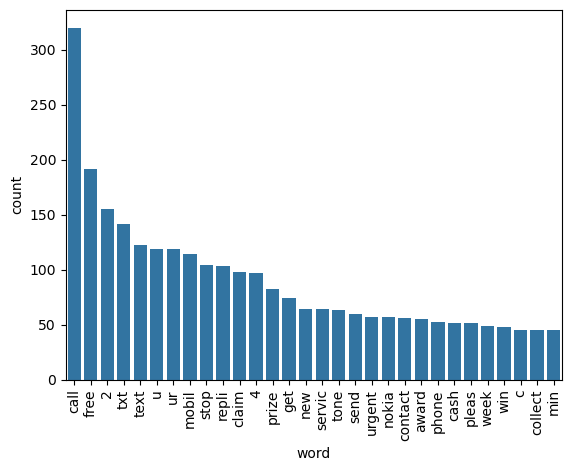

In [114]:
sns.barplot(x='word', y='count', data=pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count']))
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
ham_words_list = df[df['target'] == 0]['transformed_text'].tolist()

for text in ham_words_list:
    for word in text.split():
        ham_corpus.append(word)

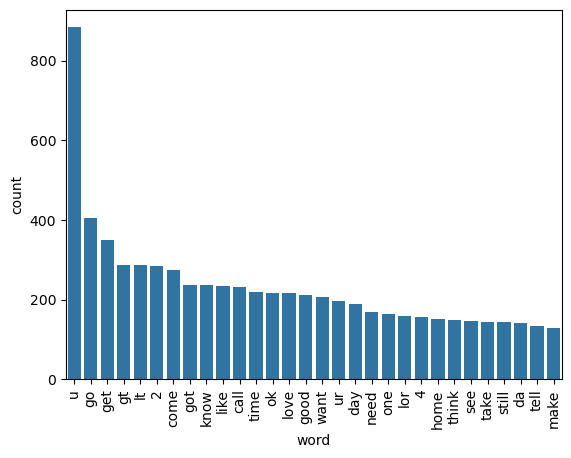

In [ ]:
sns.barplot(x='word', y='count', data=pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count']))
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building